This script is to double check the result of pandas dataframe agent to make sure they are correct.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/ds_salaries.csv')

In [3]:
# how many rows and columns are there in the dataset?

df.shape

(3755, 11)

In [4]:
# are there any missing values?

df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [5]:
# what are the columns?

df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [6]:
# how many categories are in each column?

df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [7]:
# which are the top 5 jobs that have the highest median salary?

df.groupby('job_title')['salary'].median().sort_values(ascending=False).head()

job_title
Head of Machine Learning    6000000.0
Principal Data Architect    3000000.0
Data Analytics Lead          922500.0
Power BI Developer           400000.0
Data Science Tech Lead       375000.0
Name: salary, dtype: float64

In [8]:
# what is the percentage of data scientists who are working full time?

df[df['job_title'] == 'Data Scientist']['employment_type'].value_counts(normalize=True)

employment_type
FT    0.995238
PT    0.003571
FL    0.001190
Name: proportion, dtype: float64

In [15]:
# which company location has the most employees working remotely? 
# Note: the answer is wrong. There are a lot of companies that has the same value (100), and the last one was taken as answer.

df.groupby('company_location')['remote_ratio'].max()

company_location
AE    100
AL     50
AM      0
AR    100
AS    100
     ... 
TH    100
TR    100
UA    100
US    100
VN      0
Name: remote_ratio, Length: 72, dtype: int64

In [16]:
df.groupby('company_location')['remote_ratio'].max().sort_values(ascending=False).head(50)

company_location
AE    100
GR    100
HU    100
ID    100
IL    100
IN    100
IR    100
JP    100
KE    100
LU    100
MX    100
MY    100
NG    100
NL    100
PH    100
PK    100
PL    100
PR    100
PT    100
SE    100
SG    100
SI    100
SK    100
TH    100
TR    100
UA    100
US    100
HR    100
IE    100
CF    100
BE    100
CR    100
GB    100
CL    100
AU    100
CH    100
CZ    100
AS    100
DE    100
DK    100
CO    100
CA    100
EE    100
EG    100
BR    100
ES    100
FI    100
FR    100
AR    100
BS     50
Name: remote_ratio, dtype: int64

In [17]:
# what is the most frequent job position for senior-level employees?

df[df['experience_level'] == 'SE']

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
...,...,...,...,...,...,...,...,...,...,...,...
3744,2020,SE,FT,Machine Learning Engineer,40000,EUR,45618,HR,100,HR,S
3745,2021,SE,FT,Director of Data Science,168000,USD,168000,JP,0,JP,S
3749,2021,SE,FT,Data Specialist,165000,USD,165000,US,100,US,L
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L


In [28]:
df[df['experience_level'] == 'SE']['job_title'].mode()

0    Data Engineer
Name: job_title, dtype: object

In [29]:
# what are the categories of company size? What is the proportion of employees they have? What is the total salary they pay for their employees?

df['company_size'].value_counts()

company_size
M    3153
L     454
S     148
Name: count, dtype: int64

In [30]:
df.groupby('company_size')['salary_in_usd'].sum()

company_size
L     53708646
M    451290619
S     11577549
Name: salary_in_usd, dtype: int64

<Axes: xlabel='company_size'>

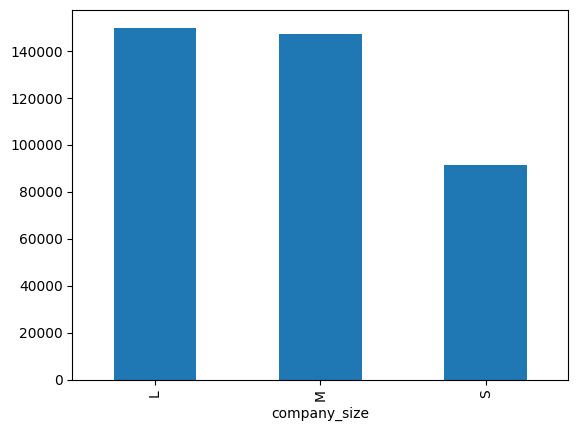

In [31]:
# get median salaries of senior-level data scientists for each company size and plot them in a bar plot.

df[df['experience_level'] == 'SE'].groupby('company_size')['salary_in_usd'].median().plot.bar()

In [32]:
df_2022 = df[df['work_year'] == 2022]
df_2023 = df[df['work_year'] == 2023]

In [34]:
# how many rows and columns are there for each dataframe?

df_2022.shape

(1664, 11)

In [35]:
df_2023.shape

(1785, 11)

In [37]:
# what are the differences in median salary for data scientists among the dataframes?

result_1 = df_2022[df_2022['job_title'] == 'Data Scientist']['salary_in_usd'].median()
result_1

140400.0

In [38]:
result_2 = df_2023[df_2023['job_title'] == 'Data Scientist']['salary_in_usd'].median()
result_2

155500.0

In [39]:
result_2 - result_1

15100.0

In [40]:
# how many people were hired for each of the dataframe? what are the percentages of experience levels?
# Note: answer to the first question is incorrect.

df_2022['experience_level'].value_counts()

experience_level
SE    1138
MI     361
EN     124
EX      41
Name: count, dtype: int64

In [41]:
df_2022['experience_level'].value_counts(normalize=True)

experience_level
SE    0.683894
MI    0.216947
EN    0.074519
EX    0.024639
Name: proportion, dtype: float64

In [42]:
df_2023['experience_level'].value_counts()

experience_level
SE    1287
MI     320
EN     118
EX      60
Name: count, dtype: int64

In [43]:
df_2023['experience_level'].value_counts(normalize=True)

experience_level
SE    0.721008
MI    0.179272
EN    0.066106
EX    0.033613
Name: proportion, dtype: float64

In [44]:
df_2022.shape

(1664, 11)

In [45]:
df_2023.shape

(1785, 11)

In [46]:
# what is the median salary of senior data scientists for df2, given there is a 10% increment?

df_2023[(df_2023['experience_level'] == 'SE') & (df_2023['job_title'] == 'Data Scientist')]['salary_in_usd'].median()

165000.0

In [48]:
df_2023[(df_2023['experience_level'] == 'SE') & (df_2023['job_title'] == 'Data Scientist')]['salary_in_usd'].median() * 1.1

181500.00000000003